\begin{align*}

P [X = n] =  \binom{N}{n} p^n (1-p)^{N-n} \newline
\binom{N}{n} = \frac{N!}{n!(N-n)!}
\end{align*}


X ... náhodná proměnná\
N ... počet členů vzorku\
n ... zvolená hodnota\
p ... pravděpoodobnost úspěchu

Binomické rozdělení: diskrétní rozdělení pro N nezávislých pokusů, kde náhodná proměnná nabývá pár hodnot (třeba ano, ne) se stále stejnou pravděpodobností. Ta nemusí být 50:50, ale třeba 30:70. Nicméně je pro všechny pokusy stejná

U náhodné veličiny platí: pokud rozdělím časovou osu, pravděpodobnost, že se v jednom intervalu jev stane 2x je 0. Nové instance události nezáleží na předchozích.

Příklad 4.3.1.    Student VŠB Pepe má potíže s ranním vstáváním. Proto někdy zaspí a nestihne přednášku, která začíná již v 9 hodin. Pravděpodobnost, že zaspí, je 0,3. V semestru je 12 přednášek - tzn. 12 nezávislých pokusů dorazit na přednášku včas. Nalezněte pravděpodobnost, že Pepe nestihne přednášku v důsledku zaspání v polovině nebo více případů.

P(X>=6) = suma (k: 6 -> 12) (12 k)*(0.3**k)*(0.7**(1-k))

In [7]:
from math import factorial as f
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
def combinatoryNumber(maxMembers: int, wantedMembers: int) -> int:
    if any(not isinstance(i, int) for i in (maxMembers, wantedMembers)): raise TypeError("One of the arguments is not an integer")
    if any(i < 0 for i in (maxMembers, wantedMembers)): raise ValueError("One of the arguments inputted is negative, which is impossible")
    if (wantedMembers > maxMembers): raise ValueError("wantedMembers inputted > maxMembers")
    
    citatel:int     = f(maxMembers)
    jmenovatel:int  = f(wantedMembers) * f(maxMembers - wantedMembers)
    return citatel/jmenovatel

def memberProbabilityBinom(maxMembers: int, selectedMember: int, successRate: float) -> float:
    if any(not isinstance(i, int) for i in (maxMembers, selectedMember)): raise TypeError("One of the arguments is not an integer")
    if any(i < 0 for i in (maxMembers, selectedMember)): raise ValueError("One of the arguments inputted is negative, which is impossible")
    if (selectedMember > maxMembers): raise ValueError("wantedMembers inputted > maxMembers")
    permutations: int = combinatoryNumber(maxMembers, selectedMember)
    successProb: float = successRate**selectedMember
    failureProb: float = (1.0-successRate)**(maxMembers-selectedMember)
    result: float = permutations*successProb*failureProb
    return result



Sleepover probabilities: [0.01384128720099999, 0.07118376274799995, 0.16779029790599986, 0.23970042557999985, 0.2311396960949999, 0.1584957916079999, 0.07924789580399996, 0.029111471927999982, 0.007797715694999996, 0.0014852791799999992, 0.00019096446599999988, 1.4880347999999992e-05]
Probability to sleep over 6 lectures: 11.78%


C:\Users\tomas.prejda\AppData\Local\Temp\ipykernel_21616\1448510996.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


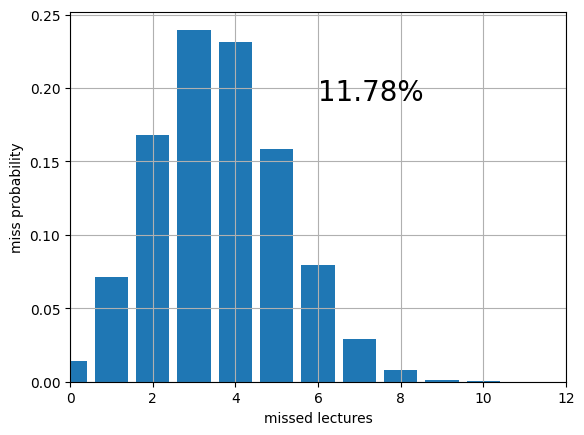

In [6]:
sleepOverProbability: float = 0.3
lectures: int = 12
missedExpected: int = 6

sleepRates: list[float] = [memberProbabilityBinom(lectures, lecture, sleepOverProbability) for lecture in range(lectures)]
print(f"Sleepover probabilities: {sleepRates}")

probability_6plusLates: float = sum(sleepRates[missedExpected:])
print(f"Probability to sleep over {missedExpected} lectures: {probability_6plusLates:.2%}")

fig: Figure
axes: Axes

fig, axes = plt.subplots(1,1)

axes.bar(range(lectures), sleepRates)
axes.text(x=lectures//2, y=max(sleepRates)*0.8, s=f"{probability_6plusLates:.2%}", fontsize=20)
axes.grid()
axes.set_xlabel("missed lectures")
axes.set_ylabel("miss probability")
axes.set_xlim((0, lectures))
fig.show()